# High Paying Skill Analyis

## we want to analyze salary data. Here's what we'll be focusing on: 
* Visualize for highest paying skills
* Visualize for highest demanded skills

In [2]:
# importing libraries
import ast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [4]:
# reading data
df = pd.read_csv('Data Jobs in India.csv', encoding = 'unicode_escape')

In [6]:
# printing data
df

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Data Engineer,Big Data Engineer,"Pune, Maharashtra, India",via LinkedIn,Full-time,False,India,15-06-2023 13:28,False,False,India,NaN,NaN,NaN,Hexaware Technologies,"['powershell', 'python', 'sql', 'mysql', 'sql ...","{'cloud': ['databricks', 'azure'], 'databases'..."
1,Data Scientist,Data Scientist,"Pune, Maharashtra, India",via Indeed,Full-time,False,India,26-04-2023 13:20,False,False,India,NaN,NaN,NaN,Bitwise Solutions,"['r', 'sql', 'python', 'scala', 'java', 'c++',...","{'analyst_tools': ['tableau'], 'libraries': ['..."
2,Data Scientist,Data Scientist,"Pune, Maharashtra, India",via Exusia,Full-time,False,India,26-03-2023 13:16,False,False,India,NaN,NaN,NaN,Exusia,NaN,NaN
3,Data Analyst,Data Quality and Governance Analyst 1,India,via Trabajo.org,Full-time,False,India,23-07-2023 13:24,False,False,India,NaN,NaN,NaN,"Jones Lang LaSalle IP, Inc","['sql', 'python', 'databricks', 'power bi', 'e...","{'analyst_tools': ['power bi', 'excel', 'word'..."
4,Senior Data Engineer,"Senior Data Engineer(Python)-1563,1637&1633","Chennai, Tamil Nadu, India",via HR Software For Growing Businesses | Fresh...,Full-time,False,India,10-11-2023 13:30,True,False,India,NaN,NaN,NaN,CESIT,"['python', 'sql', 'aws', 'pyspark', 'docker', ...","{'async': ['jira'], 'cloud': ['aws'], 'librari..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51083,Data Engineer,India - Collections Analyst II,India,melalui BeBee India,Pekerjaan tetap,False,India,13-03-2023 06:16,False,False,India,NaN,NaN,NaN,Varite India Private Limited,"['excel', 'flow']","{'analyst_tools': ['excel'], 'other': ['flow']}"
51084,Data Analyst,Amul Careers 2023 - Apply Online - Data Analys...,India,melalui Jobsleworld - Jobs In India - Job Vaca...,Pekerjaan tetap,False,India,13-03-2023 06:16,False,False,India,NaN,NaN,NaN,Amul,NaN,NaN
51085,Software Engineer,Application Support Analyst,India,melalui BeBee India,Pekerjaan tetap,False,India,13-03-2023 06:16,False,False,India,NaN,NaN,NaN,CompuGroup Medical,"['c#', 'sql']","{'programming': ['c#', 'sql']}"
51086,Business Analyst,Senior Performance QA Analyst,India,melalui BeBee India,Pekerjaan tetap,False,India,13-03-2023 06:16,False,False,India,NaN,NaN,NaN,Diebold Nixdorf,NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51088 entries, 0 to 51087
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   job_title_short        51088 non-null  object 
 1   job_title              51088 non-null  object 
 2   job_location           51086 non-null  object 
 3   job_via                51088 non-null  object 
 4   job_schedule_type      50993 non-null  object 
 5   job_work_from_home     51088 non-null  bool   
 6   search_location        51088 non-null  object 
 7   job_posted_date        51088 non-null  object 
 8   job_no_degree_mention  51088 non-null  bool   
 9   job_health_insurance   51088 non-null  bool   
 10  job_country            51088 non-null  object 
 11  salary_rate            589 non-null    object 
 12  salary_year_avg        582 non-null    float64
 13  salary_hour_avg        7 non-null      float64
 14  company_name           51085 non-null  object 
 15  jo

In [15]:
# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
# df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [19]:
# Only get data analyst jobs
df_DA = df[(df['job_title_short'] == 'Data Analyst')].copy()

# Drop NaN values from the 'salary_year_avg' column for accurate visualization
df_DA = df_DA.dropna(subset=['salary_year_avg'])

In [21]:
df_DA = df_DA.explode('job_skills')

df_DA[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
836,50400.0,python
836,50400.0,sql
836,50400.0,aws
836,50400.0,azure
836,50400.0,excel


In [23]:
df_DA_top_pay = df_DA.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median', ascending=False)

df_DA_top_pay = df_DA_top_pay.head(10)

df_DA_top_pay

,count,median
job_skills,,
pyspark,1,165000.0
linux,1,165000.0
gitlab,1,165000.0
mysql,1,165000.0
postgresql,1,165000.0
mongodb,6,163782.0
gdpr,2,163782.0
neo4j,1,163782.0
databricks,3,163782.0


In [27]:
df_DA_skills = df_DA.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_DA_skills = df_DA_skills.head(10).sort_values(by='median', ascending=False)

df_DA_skills

,count,median
job_skills,,
spark,11,111175.0
power bi,17,111175.0
tableau,20,108087.5
excel,39,98500.0
sql,46,96050.0
python,36,96050.0
azure,15,93600.0
r,18,79200.0
aws,12,79200.0


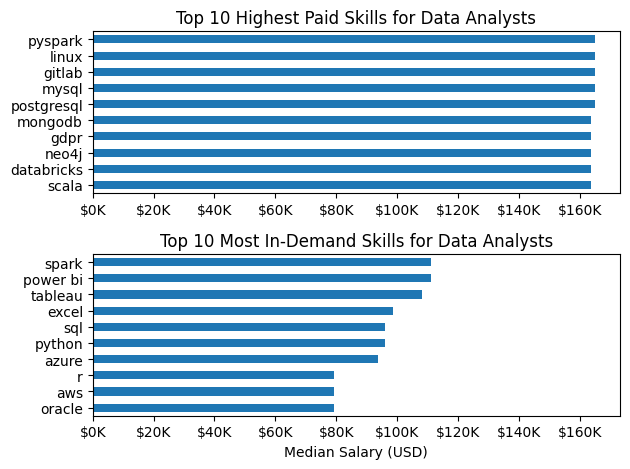

In [29]:
fig, ax = plt.subplots(2, 1)  

# Top 10 Highest Paid Skills for Data Analysts
df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False) 
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))


# Top 10 Most In-Demand Skills for Data Analysts
df_DA_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim())  # Set the same x-axis limits as the first plot
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

plt.tight_layout()
plt.show()